In [12]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D

# **Red de Hopfield**

## **1. Regla de Hebb para el Aprendizaje**
La matriz de pesos se define como:
$$
w_{ij} = \sum_{\mu=1}^{P} x_i^\mu x_j^\mu
$$

Donde:
- $x_i^\mu$ es el estado de la neurona $i$ en el patrón $\mu$.
- $P$ es el número de patrones almacenados.
- $w_{ii} = 0$ para evitar autoexcitación.

---

## **2. Regla de Actualización**
Cada neurona actualiza su estado según:
$$
s_i (t+1) = \text{sign} \left( \sum_{j=1}^{N} w_{ij} s_j (t) \right)
$$

Donde la función signo es:
$$
\text{sign}(x) = \begin{cases}
1, & \text{si } x \geq 0 \\
-1, & \text{si } x < 0 \\
0, & \text{si } x = 0
\end{cases}
$$

---

## **3. Función de Energía**
La energía del sistema se define como:
$$
E = -\frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} w_{ij} s_i s_j
$$

Esta función siempre disminuye con cada actualización de estado, garantizando la convergencia de la red.

---

## **4. Capacidad Máxima de Almacenamiento**
El número máximo de patrones que se pueden almacenar sin errores es:
$$
p_{max} \approx 0.138 N
$$
Donde \( N \) es el número de neuronas en la red.

Si se supera este límite, pueden aparecer errores en la recuperación de patrones.

---

In [13]:
class HopfieldNetwork:
    def __init__(self, num_neurons, device):
        """Inicializa la red con un número específico de neuronas."""
        self.num_neurons = num_neurons
        self.W = torch.zeros((num_neurons, num_neurons), device=device)  # Matriz de pesos en el dispositivo

    def to(self, device):
        self.W = self.W.to(device)  # Mover la matriz de pesos al dispositivo
        return self

    def train(self, x):
        """Entrena la red utilizando la regla de Hebb."""
        N = self.num_neurons  # Número de neuronas
        num_patterns = len(x)  # Número de patrones
        for mu in range(num_patterns):
            for i in range(N):
                for j in range(N):
                    if i != j:  # No se conecta consigo misma
                        self.W[i][j] += (1 / N) * x[mu][i].item() * x[mu][j].item()  # Regla de Hebb

    def recover(self, state, iterations):
        """Recupera el patrón a partir de un estado inicial."""
        previous_states = set()  # Conjunto para rastrear estados anteriores
        stable_count = 0  # Contador para estados estables

        for _ in range(iterations):
            # Elegir una neurona aleatoria para actualizar
            i = random.randint(0, self.num_neurons - 1)
            total_input = 0
            
            for j in range(self.num_neurons):
                total_input += self.W[i][j] * state[j]
            
            new_state = 1 if total_input > 0 else -1  # Función de activación
            
            # Verificar si el estado ha cambiado
            if state[i] != new_state:
                state[i] = new_state
                stable_count = 0  # Reiniciar el contador si hay un cambio
            else:
                stable_count += 1  # Incrementar el contador si no hay cambio
            
            # Si el estado actual ya ha sido visto varias veces, detener
            if tuple(state) in previous_states:
                stable_count += 1
            else:
                previous_states.add(tuple(state))
            
            # Si el contador de estabilidad alcanza un umbral, detener
            if stable_count >= 500:  # Por ejemplo, 20 iteraciones estables
                break

        return state

    def energy(self, state):
        """Calcula la energía del sistema."""
        E = 0
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                E -= 0.5 * self.W[i][j] * state[i] * state[j]
        return E

    def visualizar_matriz_pesos(self):
        """Visualiza la matriz de pesos W como una superficie 3D en una ventana."""
        x = np.arange(self.num_neurons)
        y = np.arange(self.num_neurons)
        X, Y = np.meshgrid(x, y)
        Z = self.W.cpu().numpy()  # Convertir a numpy para matplotlib

        # Aplicar suavizado a la matriz de pesos
        Z_suavizado = scipy.ndimage.gaussian_filter(Z, sigma=7)

        # Crear la figura y el eje 3D
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z_suavizado, cmap='viridis')

        ax.set_title('Superficie Suavizada de la Matriz de Pesos de la Red de Hopfield')
        ax.set_xlabel('Neurona i')
        ax.set_ylabel('Neurona j')
        ax.set_zlabel('Peso')

        plt.show()

In [14]:
carita_feliz = torch.tensor([

    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
])

alien = torch.tensor([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, -1, -1, -1, -1, -1, -1, +1, +1, +1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1,
    -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1,
    -1, -1, -1, +1, +1, -1, -1, -1, -1, +1, +1, +1, -1, -1, -1, +1, +1, +1, -1, -1, -1, +1, +1, -1, -1,
    -1, -1, -1, +1, -1, -1, -1, -1, +1, +1, +1, +1, +1, -1, +1, +1, +1, +1, +1, -1, -1, -1, +1, -1, -1,
    -1, -1, +1, +1, -1, -1, -1, -1, +1, +1, -1, -1, +1, -1, +1, -1, -1, +1, +1, -1, -1, -1, +1, +1, -1,
    -1, -1, +1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, -1, +1, +1, +1, +1, +1, -1, -1, -1, -1, +1, -1,
    -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1,
    -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1,
    -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1,
    -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1,
    -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, +1, +1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
])

nave_vaca = torch.tensor([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, +1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, +1, +1, +1, +1, +1, +1, -1, -1, -1, +1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1,
    -1, -1, -1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1,
    -1, -1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, -1, -1, -1,
    -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
])

bailarin_estelar = torch.tensor([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1,
    -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1,
    -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1,
    -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1,
    -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1,
    -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1,
    -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1,
    -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, +1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
])

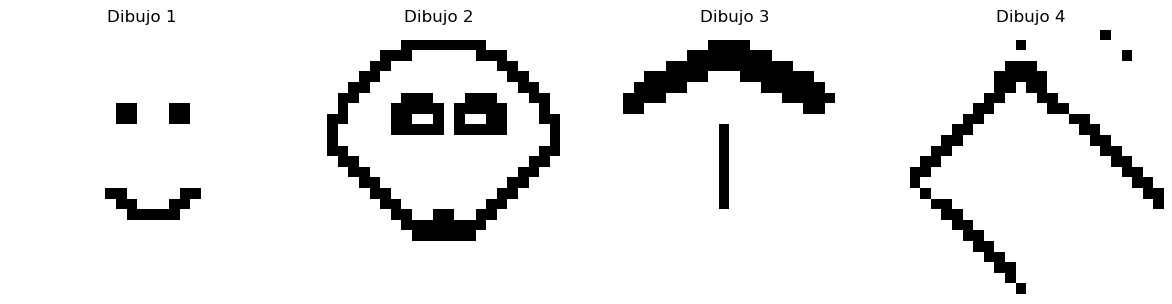

In [15]:
# Lista de nombres de las matrices
dibujos = [
    carita_feliz, 
    alien,
    nave_vaca, 
    bailarin_estelar 
]

# Configurar la figura con subplots en una fila
fig, axes = plt.subplots(1, len(dibujos), figsize=(len(dibujos) * 3, 3))  # Ajusta el tamaño según el número de dibujos

# Iterar sobre cada matriz y mostrarla
for i, (matriz, ax) in enumerate(zip(dibujos, axes)):
    if matriz is not None:  # Verificar que la matriz no sea nula
        matriz_np = matriz.cpu().numpy() if isinstance(matriz, torch.Tensor) else np.array(matriz)  # Convertir a NumPy array
        ax.imshow(matriz_np.reshape(25, 25), cmap='binary', vmin=-1, vmax=1, interpolation='nearest')  # Asegúrate de que la forma sea correcta
        ax.axis('off')  # Quitar ejes
        ax.set_title(f"Dibujo {i+1}")  # Opcional: agregar un título simple
    else:
        ax.axis('off')  # Si la matriz es nula, quitar ejes

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

Matriz de pesos W:
tensor([[0.0000, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
        [0.0032, 0.0000, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
        [0.0032, 0.0032, 0.0000,  ..., 0.0032, 0.0032, 0.0032],
        ...,
        [0.0032, 0.0032, 0.0032,  ..., 0.0000, 0.0032, 0.0032],
        [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0000, 0.0032],
        [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0000]])


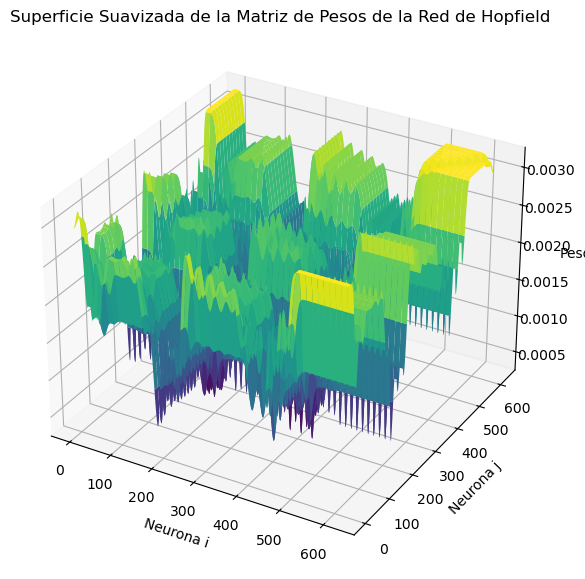

In [16]:
patrones = [
    carita_feliz, 
    alien,
    # nave_vaca, 
    # bailarin_estelar 
]

# Definir el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Inicializar la red de Hopfield en el dispositivo
devices = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
hopfield_net = HopfieldNetwork(len(patrones[0]), device).to(device)

# Mover los patrones a la GPU
patrones = [patron.to(device) for patron in patrones]

# Entrenar la red con los patrones
hopfield_net.train(patrones)

# Verificar la matriz de pesos después del entrenamiento
print("Matriz de pesos W:")
print(hopfield_net.W)

# Visualizar la matriz de pesos
hopfield_net.visualizar_matriz_pesos()

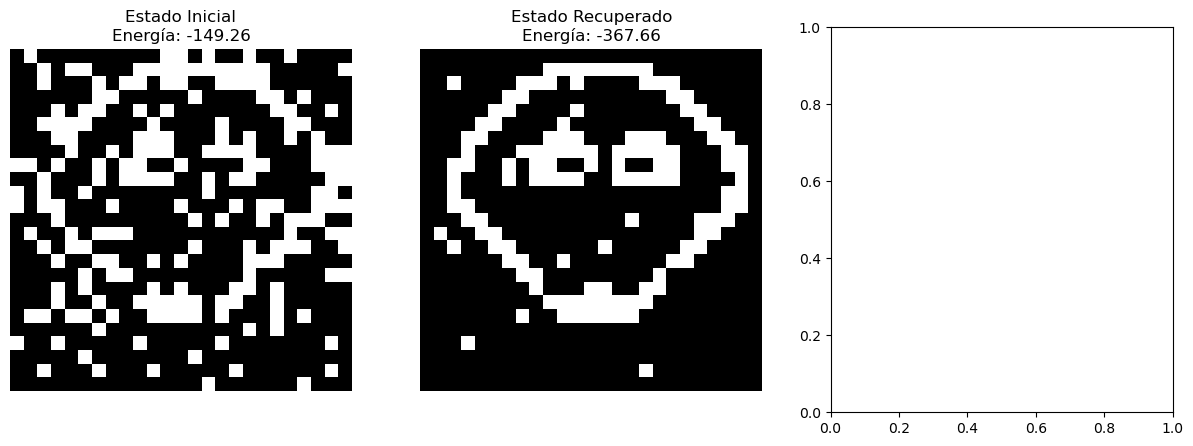

In [17]:
# Generar patrón ruidoso
def generar_ruido(patron, porcentaje_ruido=0.2):
    patron_ruidoso = patron.clone()
    num_neuronas = len(patron)
    num_ruido = int(num_neuronas * porcentaje_ruido)
    indices_ruido = random.sample(range(num_neuronas), num_ruido)
    
    for i in indices_ruido:
        patron_ruidoso[i] *= -1  # Voltea el valor
    
    return patron_ruidoso

# Crear y visualizar
patron_ruidoso = generar_ruido(alien)
estado_inicial = patron_ruidoso.clone().detach()

# Recuperar el patrón
estado_recuperado = hopfield_net.recover(estado_inicial.clone(), iterations=1000)

# Función para mostrar patrones
def mostrar_patron(patron, titulo, ax):
    ax.imshow(patron.reshape(25, 25), cmap='gray')
    ax.set_title(titulo)
    ax.axis('off')

# Calcular energías
energia_inicial = hopfield_net.energy(estado_inicial)
energia_final = hopfield_net.energy(estado_recuperado)

# Crear figura
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Estado inicial ruidoso
mostrar_patron(estado_inicial, 
              f'Estado Inicial\nEnergía: {energia_inicial:.2f}', axs[0])

# Estado recuperado
mostrar_patron(estado_recuperado, 
              f'Estado Recuperado\nEnergía: {energia_final:.2f}', axs[1])